In [33]:
import cv2
import numpy as np
from keras.preprocessing import image
#from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt

In [34]:
model = load_model("model.h5")

In [35]:
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

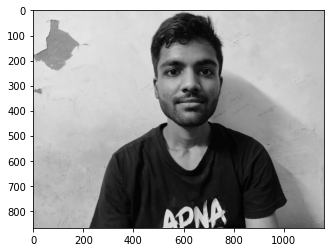

In [36]:
img = cv2.imread('rohit/r3.jpeg')
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap='gray')

1/1 [==============================] - 0s 164ms/step
sad


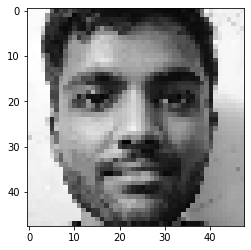

In [37]:
faces_detected = face_haar_cascade.detectMultiScale(gray_img,1.32,5)
    
for (x,y,w,h) in faces_detected:
        #cropping region of interest
        roi_gray = gray_img[y:y + w, x:x + h]
        roi_gray = cv2.resize(roi_gray,(48,48))
        img_pixels = image.image_utils.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels,axis=0)
        #img_pixels /= 255
        
        predictions = model.predict(img_pixels)
        
        max_index = np.argmax(predictions[0])
        
        emotions =  ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        
        predicted_emotion = emotions[max_index]

        plt.imshow(roi_gray,cmap='gray')
        print(predicted_emotion)